In [17]:
import rioxarray as rxr

# Load FAO-56 ETo raster
eto = rxr.open_rasterio("../data/processed/kolhapur_eto_fao56_mmday.tif", masked=True)

print(eto)


<xarray.DataArray (band: 1, y: 16, x: 13)> Size: 2kB
[208 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 128B 17.2 17.1 17.0 16.9 ... 16.0 15.9 15.8 15.7
  * x            (x) float64 104B 73.6 73.7 73.8 73.9 ... 74.5 74.6 74.7 74.8
    spatial_ref  int64 8B 0
Attributes: (12/35)
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            fc
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.1
    ...                                       ...
    long_name:                                2 metre temperature
    standard_name:                            unknown
    units:                                    K
    AREA_OR_POINT:                            Area
    scale_factor:                             1.0
    add_offset

In [18]:
eto = eto.rio.reproject_match(fret)


In [19]:
et = fret * eto

print("ET min:", float(et.min()))
print("ET max:", float(et.max()))
print("ET mean:", float(et.mean()))


ET min: 0.07448740019132169
ET max: 9.024146308633835
ET mean: 7.623107028076877


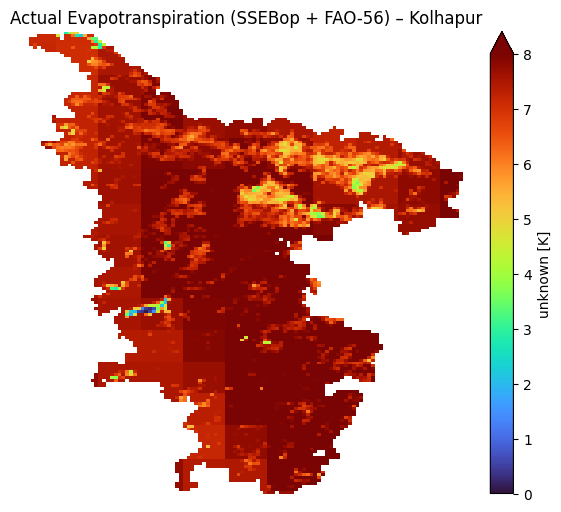

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
et.plot(cmap="turbo", vmin=0, vmax=8)
plt.title("Actual Evapotranspiration (SSEBop + FAO-56) – Kolhapur")
plt.axis("off")
plt.show()


In [21]:
output_et_path = "../data/processed/kolhapur_et_ssebop_fao56_mmday.tif"

et.rio.to_raster(output_et_path)

print("Final ET raster saved:", output_et_path)


Final ET raster saved: ../data/processed/kolhapur_et_ssebop_fao56_mmday.tif
